In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [52]:
data = pd.read_csv("Advanced Features Claims Data.csv")

In [53]:
data.head()

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [54]:
 data.isnull().sum()

Unnamed: 0                      0
months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injurie

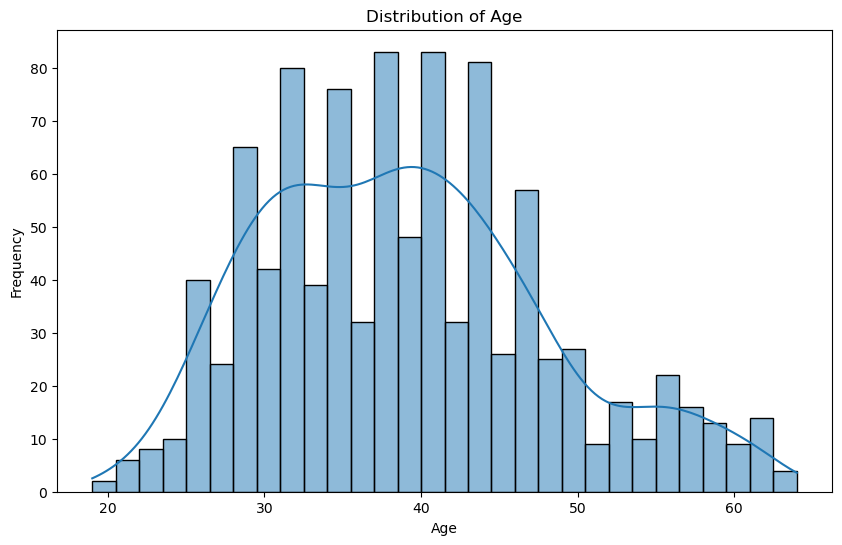

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

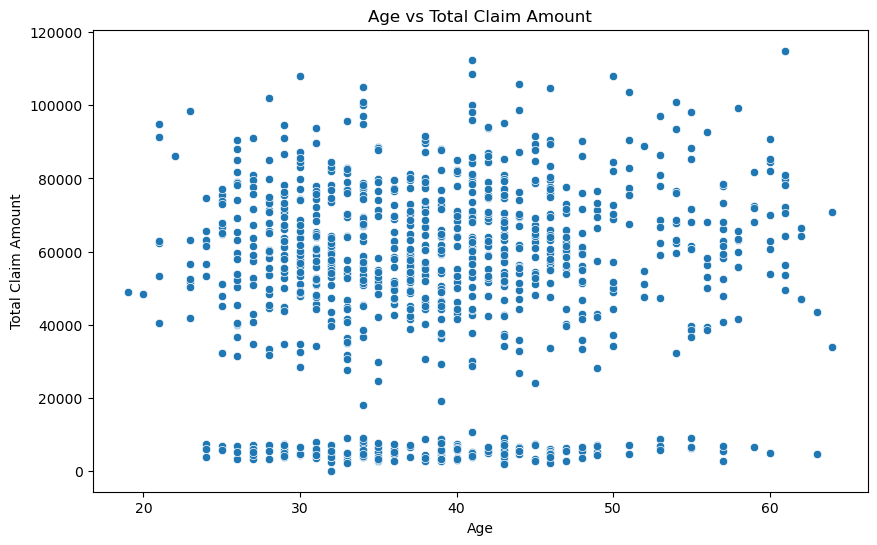

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=data)
plt.title('Age vs Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

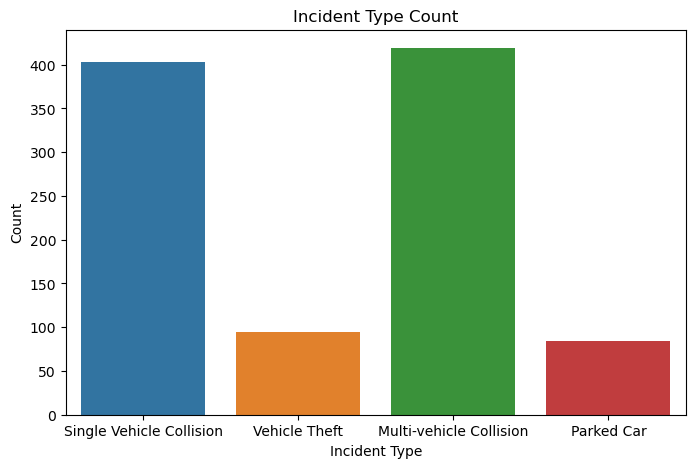

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(x='incident_type', data=data)
plt.title('Incident Type Count')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

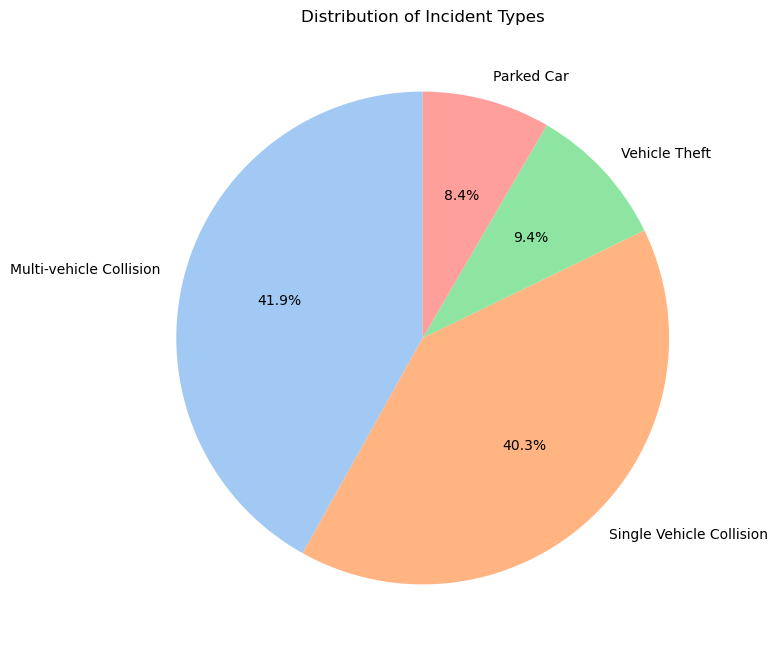

In [61]:

incident_type_counts = data['incident_type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(incident_type_counts, labels=incident_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Incident Types')
plt.show()


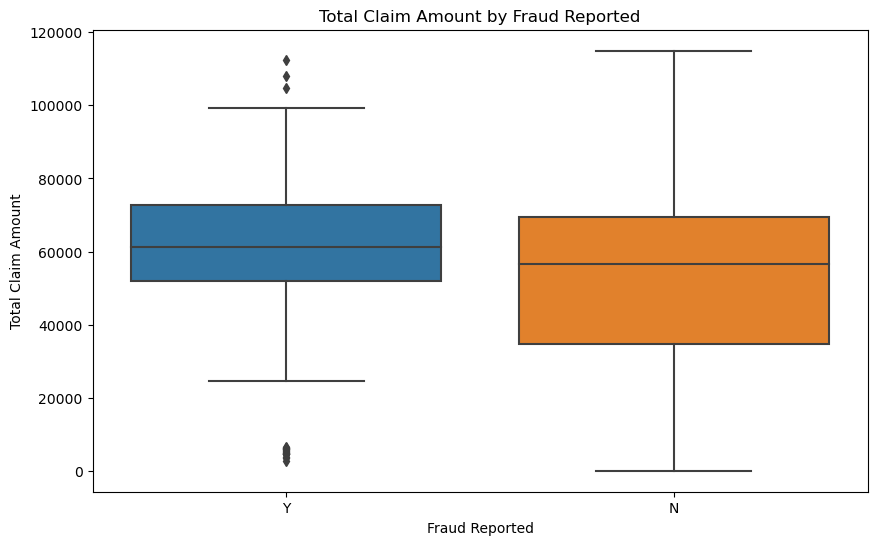

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=data)
plt.title('Total Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

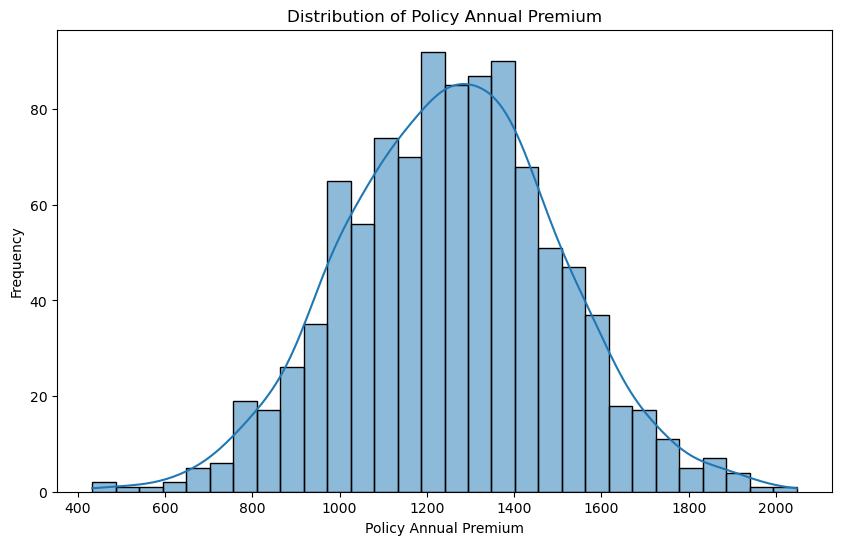

In [59]:

plt.figure(figsize=(10, 6))
sns.histplot(data['policy_annual_premium'], bins=30, kde=True)
plt.title('Distribution of Policy Annual Premium')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Frequency')
plt.show()

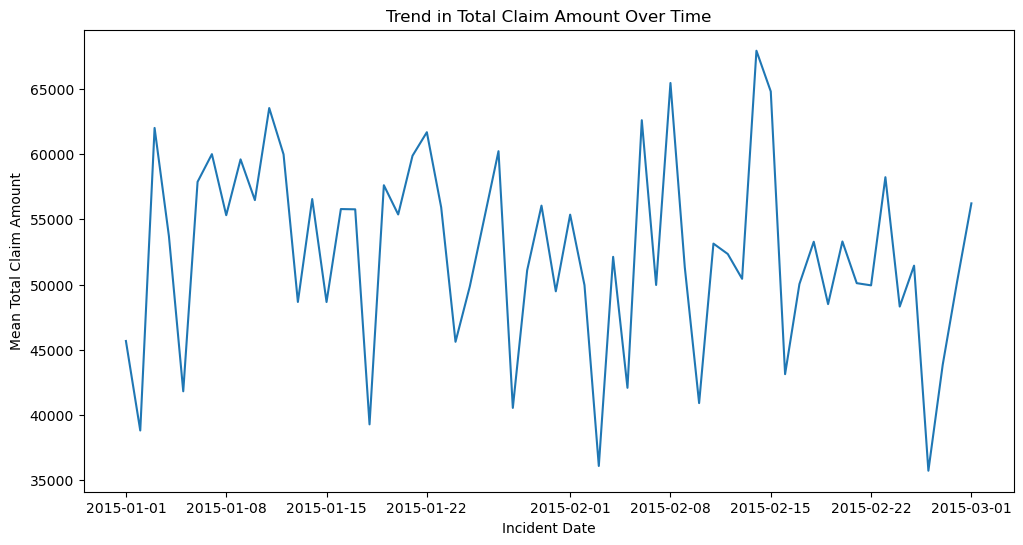

In [60]:
data['incident_date'] = pd.to_datetime(data['incident_date'])


data['incident_month'] = data['incident_date'].dt.month
data['incident_year'] = data['incident_date'].dt.year




monthly_claim_amount = data.groupby(['incident_year', 'incident_month'])['total_claim_amount'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='incident_date', y='total_claim_amount', data=data, estimator='mean', ci=None)
plt.title('Trend in Total Claim Amount Over Time')
plt.xlabel('Incident Date')
plt.ylabel('Mean Total Claim Amount')
plt.show()

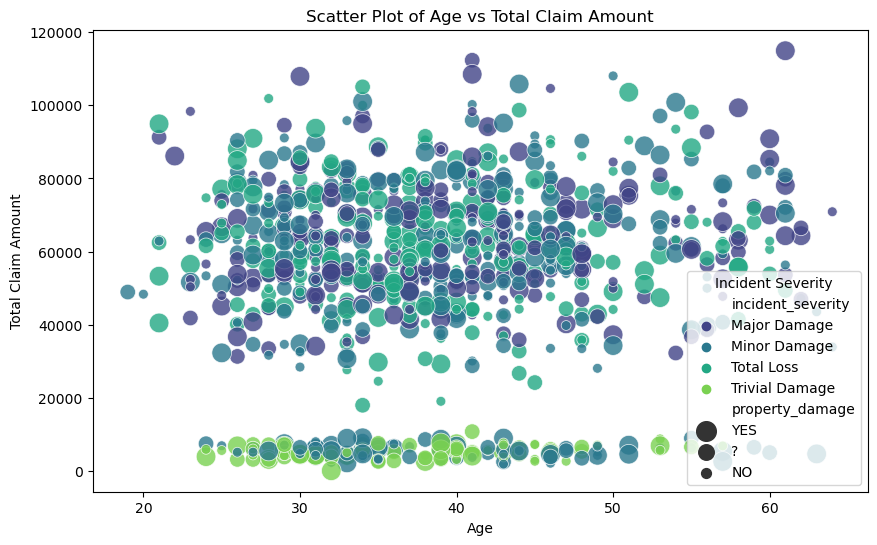

In [62]:
#================== Scatter plot for 'age' vs 'total_claim_amount'===========
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=data, hue='incident_severity', palette='viridis', size='property_damage', sizes=(50, 200), alpha=0.8)
plt.title('Scatter Plot of Age vs Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.legend(title='Incident Severity')
plt.show()


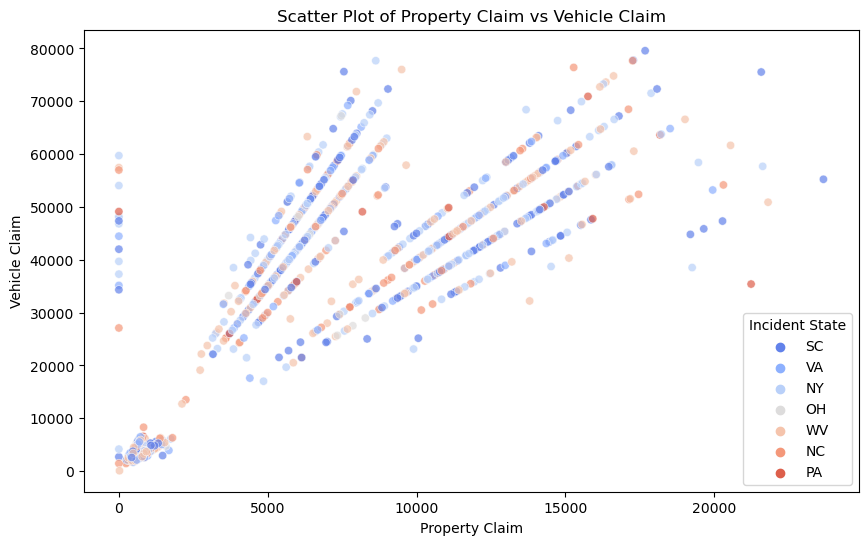

In [63]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_claim', y='vehicle_claim', data=data, hue='incident_state', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Property Claim vs Vehicle Claim')
plt.xlabel('Property Claim')
plt.ylabel('Vehicle Claim')
plt.legend(title='Incident State')
plt.show()


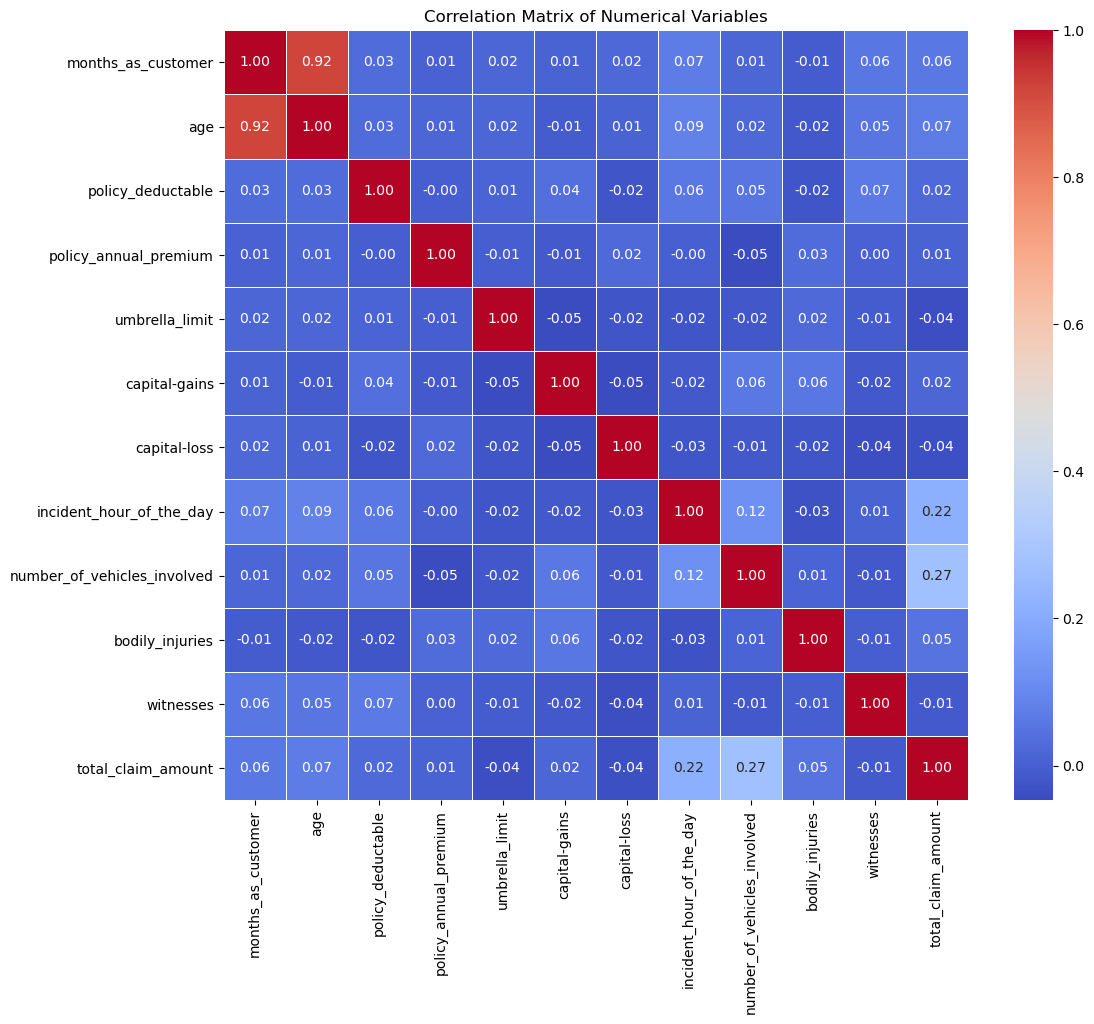

In [64]:

numerical_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 
                     'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                     'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount']



# Create a correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


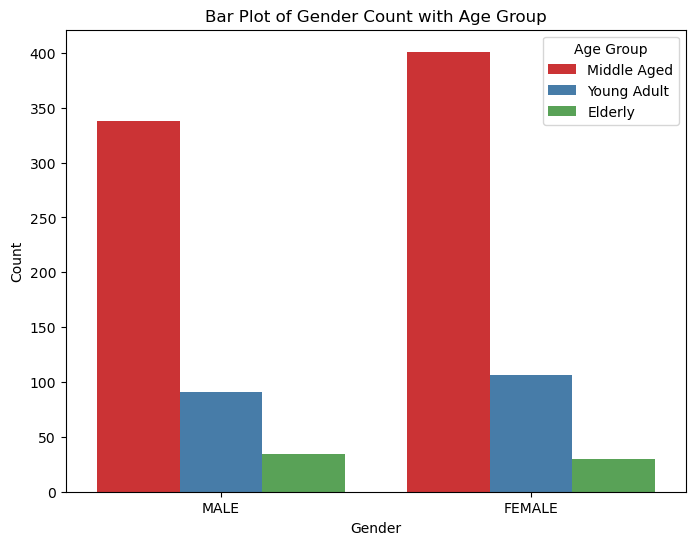

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='insured_sex', data=data, hue='ages_category', palette='Set1')
plt.title('Bar Plot of Gender Count with Age Group')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.legend(title='Age Group')
plt.show()


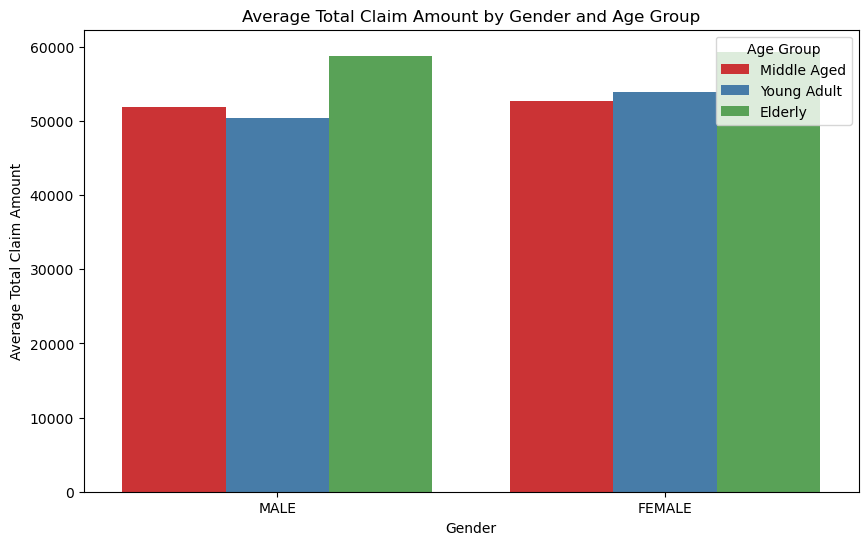

In [66]:

plt.figure(figsize=(10, 6))
sns.barplot(x='insured_sex', y='total_claim_amount', data=data, hue='ages_category', palette='Set1', ci=None)
plt.title('Average Total Claim Amount by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Average Total Claim Amount')
plt.legend(title='Age Group')
plt.show()


In [67]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

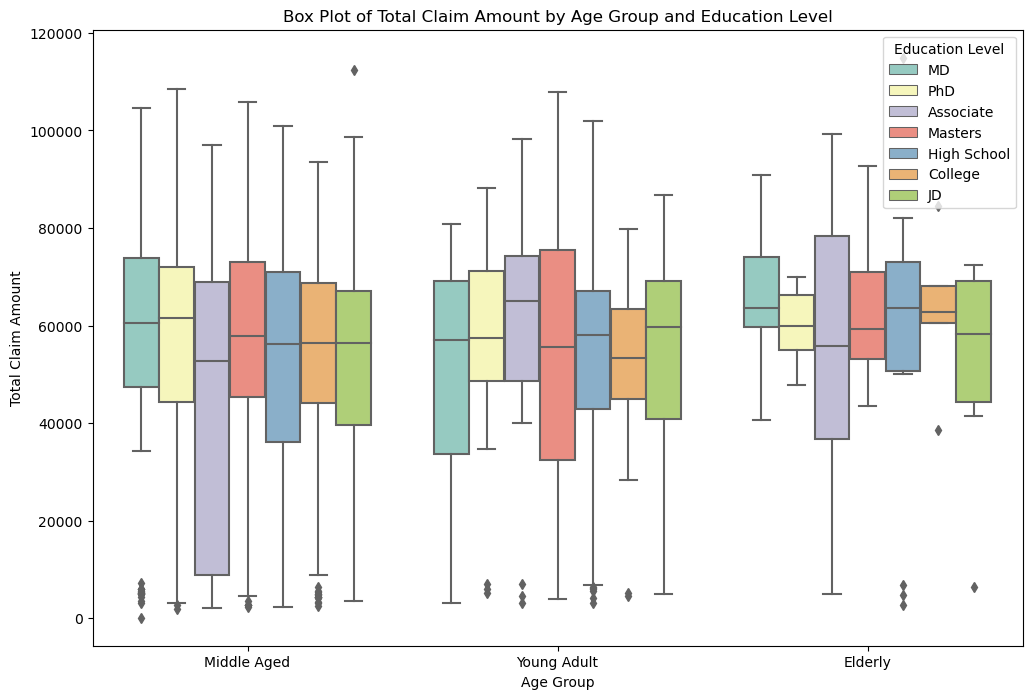

In [68]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='ages_category', y='total_claim_amount', data=data, hue='insured_education_level', palette='Set3')
plt.title('Box Plot of Total Claim Amount by Age Group and Education Level')
plt.xlabel('Age Group')
plt.ylabel('Total Claim Amount')
plt.legend(title='Education Level')
plt.show()
